<a href="https://colab.research.google.com/github/Rk-Pudasaini/Applied_Machine_Learning/blob/main/Fetal_health_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Replication of work
https://ieeexplore.ieee.org/abstract/document/10431783/

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

df  = pd.read_csv('/content/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
df.shape

(2126, 22)

In [ ]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

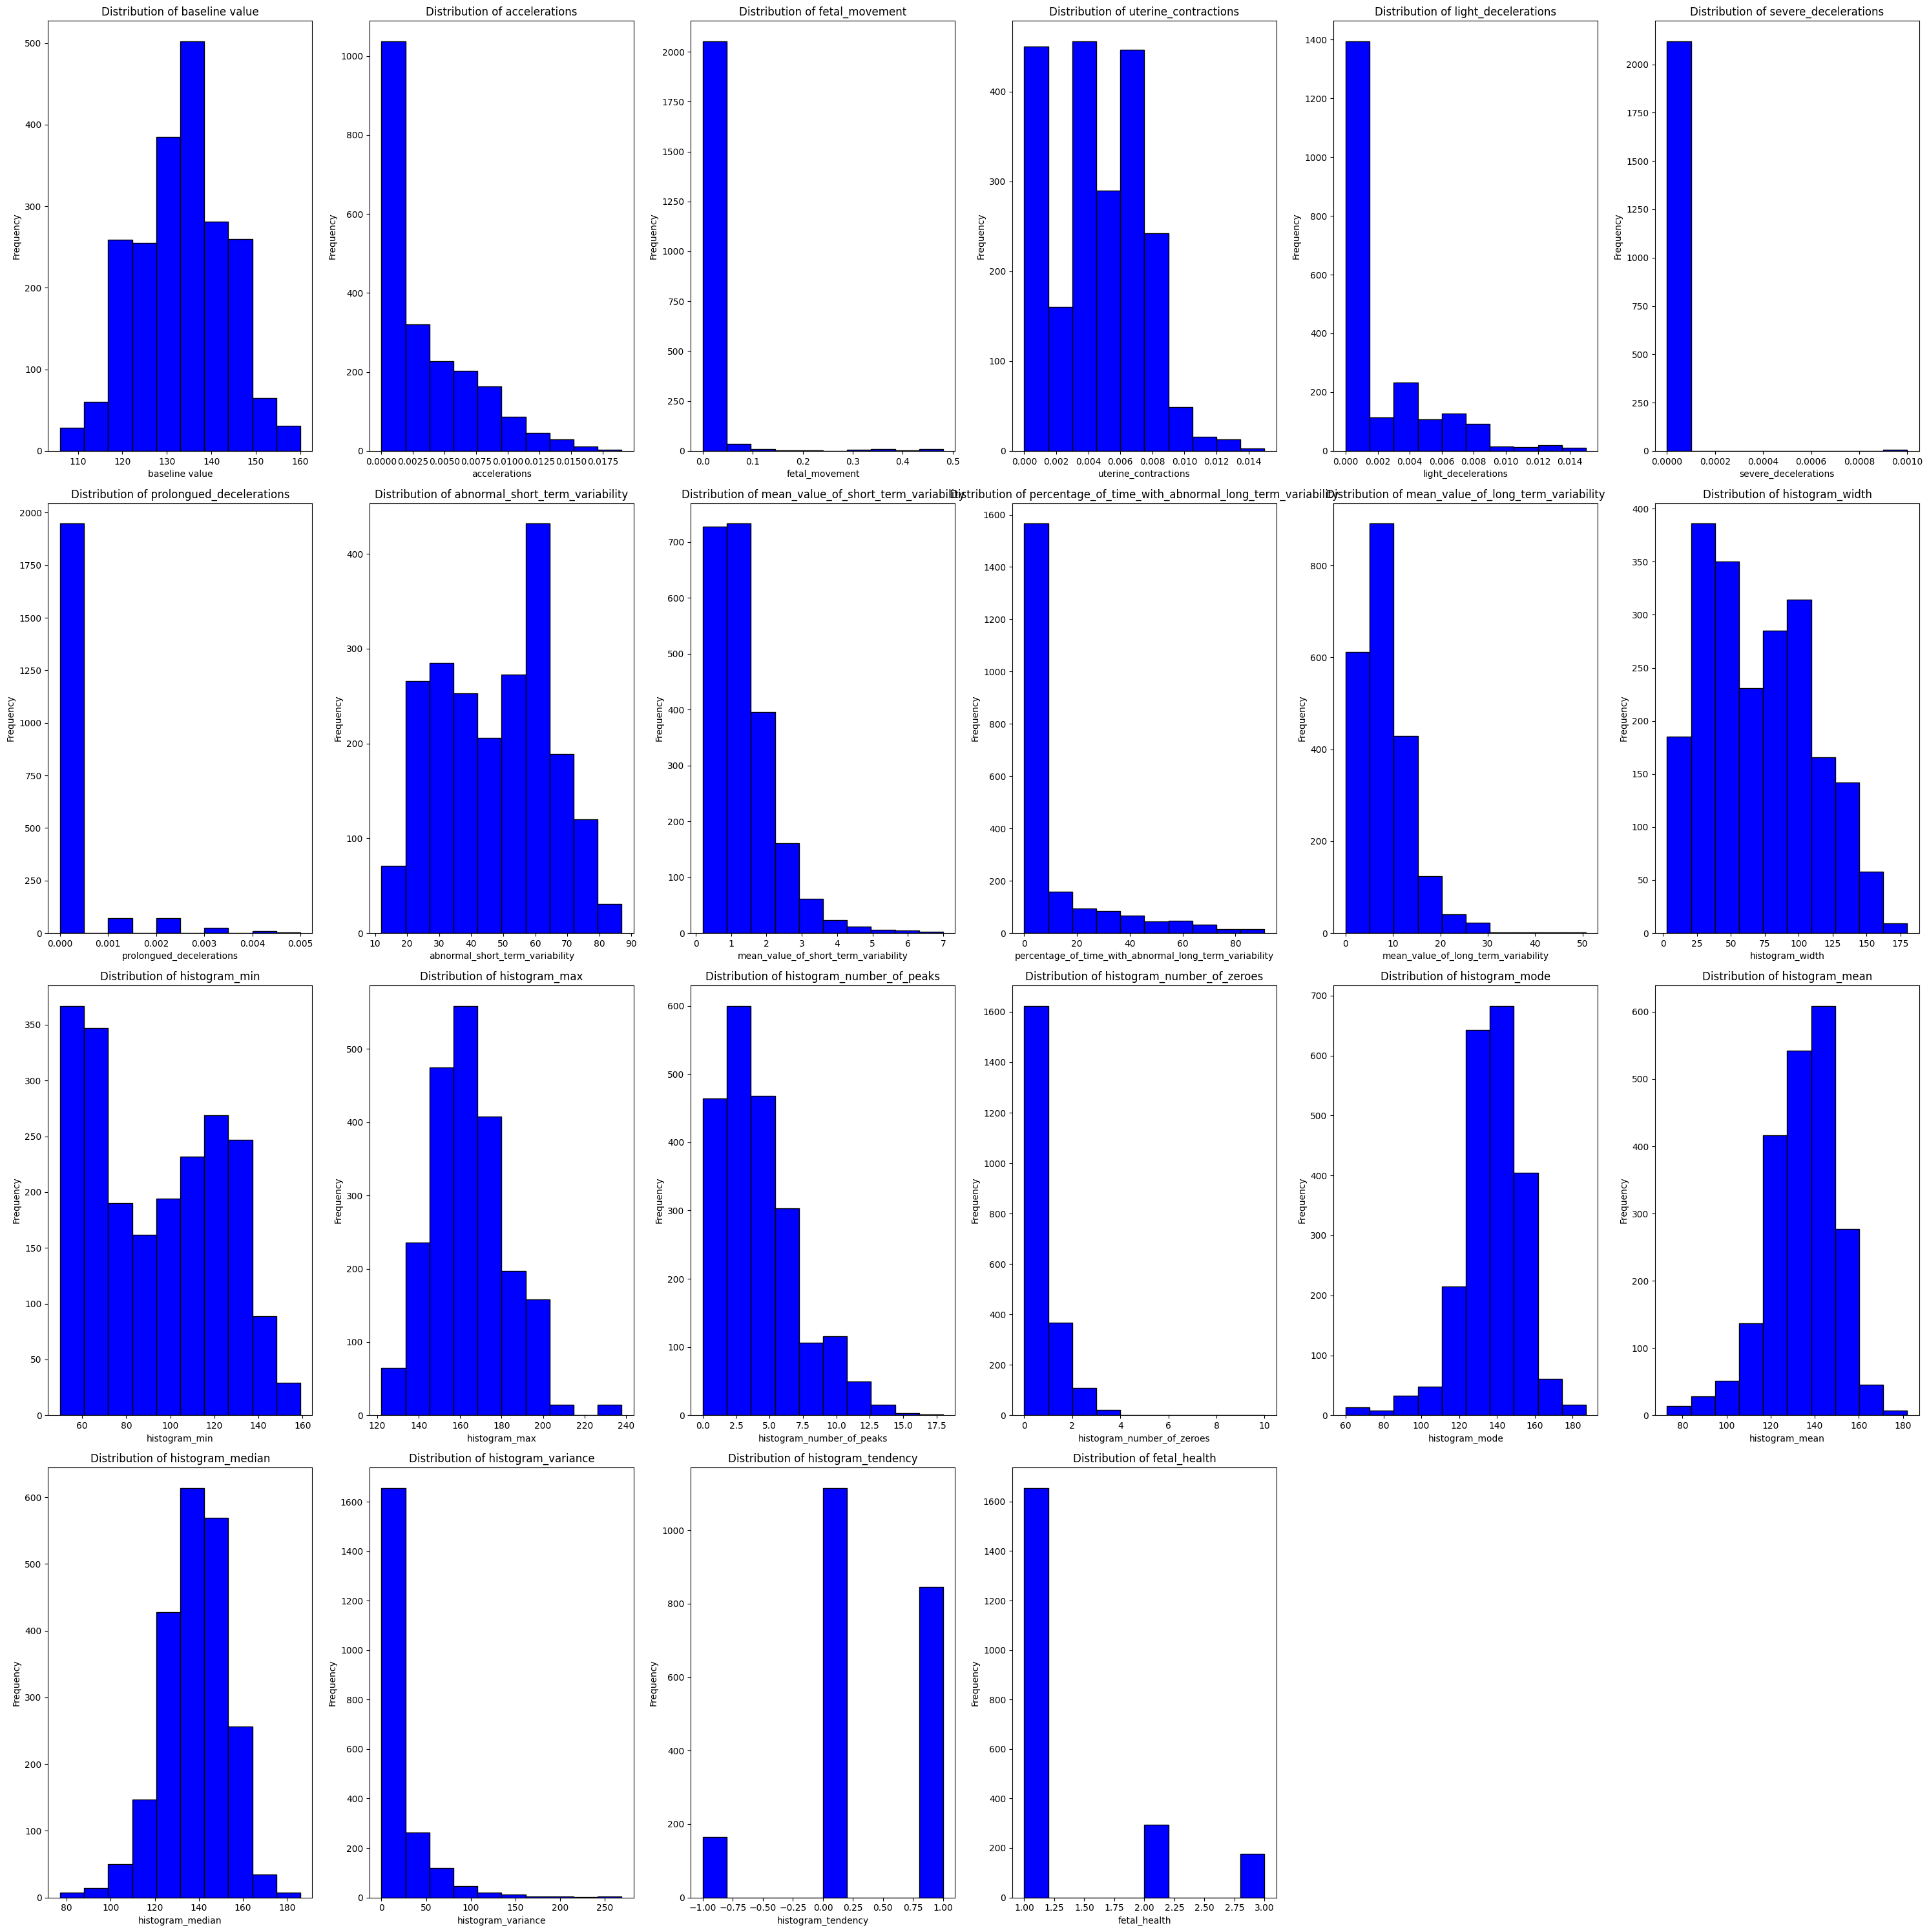

In [ ]:
import matplotlib.pyplot as plt

num_columns = len(df.columns)
num_rows = (num_columns // 6) + 1

# Plot the distribution of each column
plt.figure(figsize=(30, 30))
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 6, i+1)
    plt.hist(df[column], bins=10, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

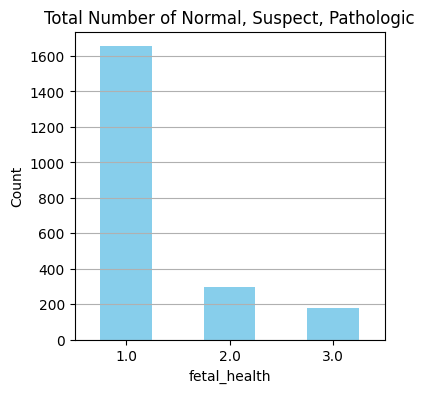

In [ ]:
# Count the values of the "NSP" column
fetal_health_counts = df['fetal_health'].value_counts()

# Plot the histogram
plt.figure(figsize=(4, 4))
fetal_health_counts.plot(kind='bar', color='skyblue')
plt.title('Total Number of Normal, Suspect, Pathologic')
plt.xlabel('fetal_health')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

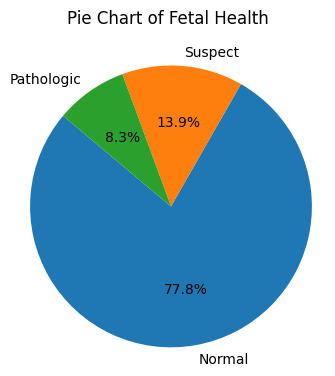

In [ ]:
# Custom labels
labels = ['Normal', 'Suspect', 'Pathologic']
# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(fetal_health_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Fetal Health \n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Random Forest Implemetations

### Random Forest without SMOTE

In [ ]:
y = df['fetal_health']
X = df.drop(['fetal_health'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_test.shape)

# Step 1: Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Step 2: Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Step 3: Predict the labels for the training data
y_train_pred = rf_classifier.predict(X_train)

print('################ For Training Data ##############')
print('\n')

# Step 4: Evaluate the performance of the classifier for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Generate classification report for training data
train_report = classification_report(y_train, y_train_pred)
print("Training Classification Report:")
print(train_report)

# Generate confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix:")
print(train_conf_matrix)

print('\n')
print('################ For Testing Data ##############')
print('\n')

# Step 5: Predict the labels for the testing data
y_test_pred = rf_classifier.predict(X_test)

# Step 6: Evaluate the performance of the classifier for testing data
test_accuracy_rf = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy_rf)

# Generate classification report for testing data
test_report = classification_report(y_test, y_test_pred)
print("Testing Classification Report:")
print(test_report)

# Generate confusion matrix for testing data
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Testing Confusion Matrix:")
print(test_conf_matrix)

(1700, 21) (426,)
################ For Training Data ##############


Training Accuracy: 0.9994117647058823
Training Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1326
         2.0       1.00      1.00      1.00       237
         3.0       1.00      1.00      1.00       137

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

Training Confusion Matrix:
[[1325    1    0]
 [   0  237    0]
 [   0    0  137]]


################ For Testing Data ##############


Testing Accuracy: 0.9436619718309859
Testing Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       329
         2.0       0.89      0.72      0.80        58
         3.0       0.94      0.87      0.91        39

    accuracy                           0.94       426
   m

# Random Forest Implementations With SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
print(y_resampled.value_counts())

fetal_health
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64


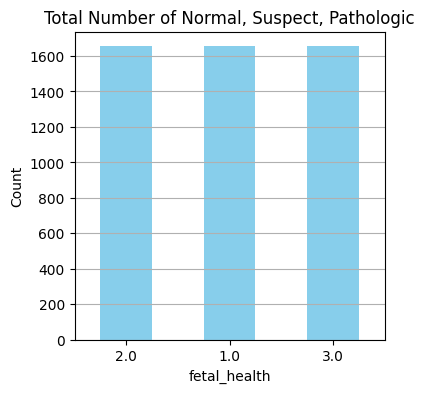

In [ ]:
# Count the values of the "NSP" column
fetal_health_counts = y_resampled.value_counts()

# Plot the histogram
plt.figure(figsize=(4, 4))
fetal_health_counts.plot(kind='bar', color='skyblue')
plt.title('Total Number of Normal, Suspect, Pathologic')
plt.xlabel('fetal_health')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size = 0.2)
print(X_train1.shape, y_test1.shape)

# Step 1: Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Step 2: Fit the classifier to the training data
rf_classifier.fit(X_train1, y_train1)

# Step 3: Predict the labels for the training data
y_train_pred = rf_classifier.predict(X_train1)

print('################ For Training Data ##############')
print('\n')

# Step 4: Evaluate the performance of the classifier for training data
train_accuracy = accuracy_score(y_train1, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Generate classification report for training data
train_report = classification_report(y_train1, y_train_pred)
print("Training Classification Report:")
print(train_report)

# Generate confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train1, y_train_pred)
print("Training Confusion Matrix:")
print(train_conf_matrix)

print('\n')
print('################ For Testing Data ##############')
print('\n')

# Step 5: Predict the labels for the testing data
y_test_pred = rf_classifier.predict(X_test1)

# Step 6: Evaluate the performance of the classifier for testing data
test_accuracy_rf = accuracy_score(y_test1, y_test_pred)
print("Testing Accuracy:", test_accuracy_rf)

# Generate classification report for testing data
test_report = classification_report(y_test1, y_test_pred)
print("Testing Classification Report:")
print(test_report)

# Generate confusion matrix for testing data
test_conf_matrix = confusion_matrix(y_test1, y_test_pred)
print("Testing Confusion Matrix:")
print(test_conf_matrix)


(3972, 21) (993,)
################ For Training Data ##############


Training Accuracy: 0.9997482376636455
Training Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1317
         2.0       1.00      1.00      1.00      1325
         3.0       1.00      1.00      1.00      1330

    accuracy                           1.00      3972
   macro avg       1.00      1.00      1.00      3972
weighted avg       1.00      1.00      1.00      3972

Training Confusion Matrix:
[[1317    0    0]
 [   1 1324    0]
 [   0    0 1330]]


################ For Testing Data ##############


Testing Accuracy: 0.9778449144008057
Testing Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      0.96      0.98       338
         2.0       0.95      0.99      0.97       330
         3.0       1.00      0.98      0.99       325

    accuracy                           0.98       993
   m

# KNN Implementation

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
y = df['fetal_health']
X = df.drop(['fetal_health'], axis = 1)

Normalizing a dataset involves scaling the features (variables) so that they all have a similar scale. This is important for certain machine learning algorithms, particularly those that rely on distance calculations, such as K-nearest neighbors or neural networks. Normalization prevents features with larger scales from dominating the learning process.


(1700, 21) (426,)


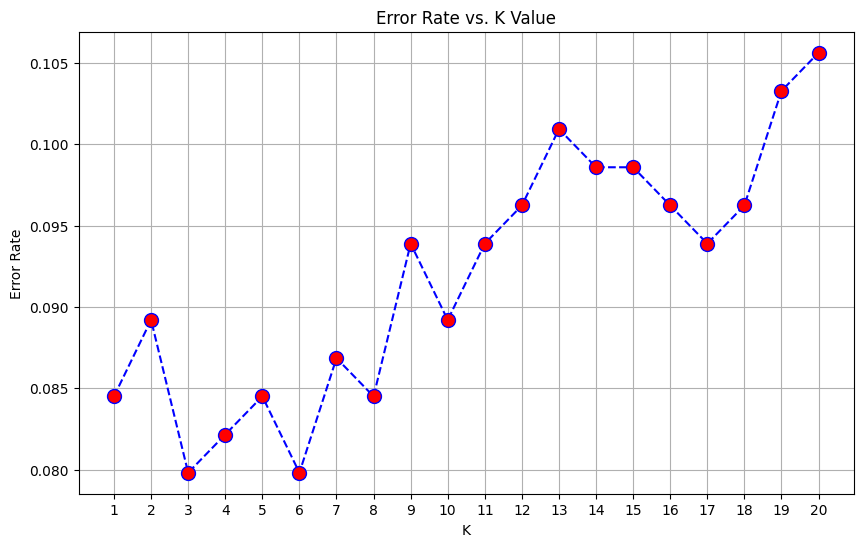

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_test.shape)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the best k value by testing
error_rate = []
for k in range(1, 21):  # Testing k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rate.append(np.mean(y_pred != y_test))

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


In [ ]:
# Choosing the best k value with the lowest error rate
best_k = np.argmin(error_rate) + 1
print(f"Best value of k: {best_k}")

Best value of k: 3


## Fit the KNN Model without SMOTE

In [ ]:
# Train KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# Predict on test set
y_test_pred = knn_classifier.predict(X_test_scaled)

print('\n')
print('################ For Testing Data (KNN) ##############')
print('\n')

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_test_pred)
print("KNN Testing Accuracy:", accuracy_knn)

# Generate classification report for testing data
test_report_knn = classification_report(y_test, y_test_pred)
print("KNN Testing Classification Report:")
print(test_report_knn)

# Generate confusion matrix for testing data
test_conf_matrix_knn = confusion_matrix(y_test, y_test_pred)
print("KNN Testing Confusion Matrix:")
print(test_conf_matrix_knn)




################ For Testing Data (KNN) ##############


KNN Testing Accuracy: 0.92018779342723
KNN Testing Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       333
         2.0       0.81      0.69      0.75        64
         3.0       0.84      0.90      0.87        29

    accuracy                           0.92       426
   macro avg       0.87      0.85      0.86       426
weighted avg       0.92      0.92      0.92       426

KNN Testing Confusion Matrix:
[[322   9   2]
 [ 17  44   3]
 [  2   1  26]]


## Fit the KNN Model with SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
y = df['fetal_health']
X = df.drop(['fetal_health'], axis = 1)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size = 0.2)
print(X_train1.shape, y_test1.shape)

(3972, 21) (993,)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

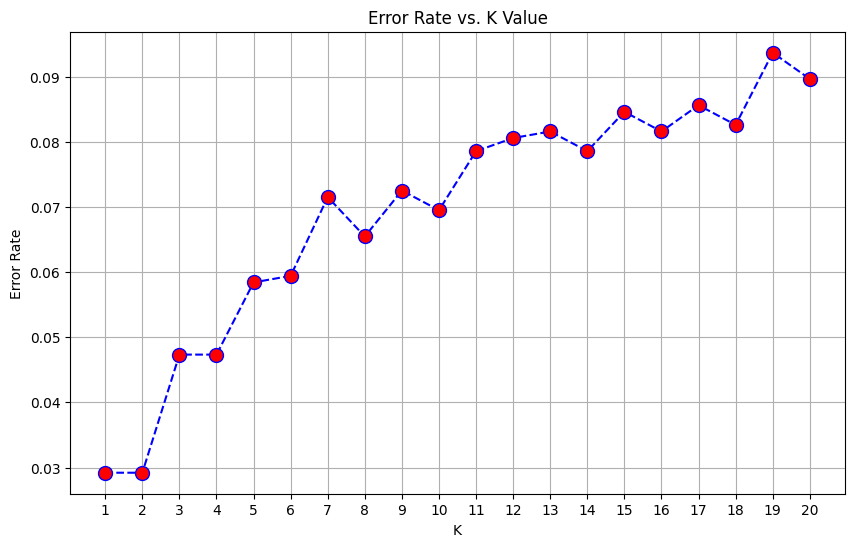

Best value of k: 1


In [ ]:
# Finding the best k value by testing
error_rate = []
for k in range(1, 21):  # Testing k from 1 to 20
    knn_smote = KNeighborsClassifier(n_neighbors=k)
    knn_smote.fit(X_train_scaled, y_train1)
    y_pred = knn_smote.predict(X_test_scaled)
    error_rate.append(np.mean(y_pred != y_test1))

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# Choosing the best k value with the lowest error rate
best_k = np.argmin(error_rate) + 1
print(f"Best value of k: {best_k}")

In [ ]:
# Train KNN classifier with k=1
knn_classifier_Smote = KNeighborsClassifier(n_neighbors=3)
knn_classifier_Smote.fit(X_train_scaled, y_train1)

# Predict on test set
y_test_pred = knn_classifier_Smote.predict(X_test_scaled)

print('\n')
print('################ For Testing Data (KNN) - SMOTE ##############')
print('\n')

# Calculate accuracy
accuracy_knn_smote = accuracy_score(y_test1, y_test_pred)
print("KNN Testing Accuracy(SMOTE):", accuracy_knn_smote)

# Generate classification report for testing data
test_report_knn_smote = classification_report(y_test1, y_test_pred)
print("KNN Testing Classification Report:(SMOTE)")
print(test_report_knn_smote)

# Generate confusion matrix for testing data
test_conf_matrix_knn_smote = confusion_matrix(y_test1, y_test_pred)
print("KNN Testing Confusion Matrix:(SMOTE)")
print(test_conf_matrix_knn_smote)




################ For Testing Data (KNN) - SMOTE ##############


KNN Testing Accuracy(SMOTE): 0.9526686807653575
KNN Testing Classification Report:(SMOTE)
              precision    recall  f1-score   support

         1.0       1.00      0.89      0.94       322
         2.0       0.89      0.98      0.93       341
         3.0       0.98      0.98      0.98       330

    accuracy                           0.95       993
   macro avg       0.96      0.95      0.95       993
weighted avg       0.96      0.95      0.95       993

KNN Testing Confusion Matrix:(SMOTE)
[[288  34   0]
 [  0 335   6]
 [  0   7 323]]


# SVM Implementations

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
y = df['fetal_health']
X = df.drop(['fetal_health'], axis = 1)

## SVM without SMOTE

In [ ]:
from sklearn.svm import SVC

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_test.shape)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit SVM classifier on resampled data
svm_classifier = SVC(kernel='linear', random_state=42)  # You can change the kernel type if needed
svm_classifier.fit(X_train_scaled, y_train)

# Predict on test set
y_test_pred = svm_classifier.predict(X_test_scaled)

print('\n')
print('################ For Testing Data (SVM) ##############')
print('\n')

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_test_pred)
print("SVM Accuracy:", accuracy_svm)

# Generate classification report for testing data
test_report_svm = classification_report(y_test, y_test_pred)
print("SVM Testing Classification Report:")
print(test_report_svm)

# Generate confusion matrix for testing data
test_conf_matrix_svm = confusion_matrix(y_test, y_test_pred)
print("SVM Testing Confusion Matrix:")
print(test_conf_matrix_svm)


(1700, 21) (426,)


################ For Testing Data (SVM) ##############


SVM Accuracy: 0.8849765258215962
SVM Testing Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       333
         2.0       0.66      0.64      0.65        64
         3.0       0.76      0.76      0.76        29

    accuracy                           0.88       426
   macro avg       0.79      0.78      0.78       426
weighted avg       0.88      0.88      0.88       426

SVM Testing Confusion Matrix:
[[314  16   3]
 [ 19  41   4]
 [  2   5  22]]


# SVM With SOMTE

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
y = df['fetal_health']
X = df.drop(['fetal_health'], axis = 1)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size = 0.2)
print(X_train1.shape, y_test1.shape)

(3972, 21) (993,)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

In [ ]:
# Fit SVM classifier on resampled data
svm_classifier_Smote = SVC(kernel='linear', random_state=42)  # You can change the kernel type if needed
svm_classifier_Smote.fit(X_train_scaled, y_train1)

# Predict on test set
y_test_pred = svm_classifier_Smote.predict(X_test_scaled)

print('\n')
print('################ For Testing Data (SVM) - SMOTE ##############')
print('\n')

# Calculate accuracy
accuracy_svm_smote = accuracy_score(y_test1, y_test_pred)
print("SVM Accuracy (SMOTE):", accuracy_svm_smote)

# Generate classification report for testing data
test_report_svm_smote = classification_report(y_test1, y_test_pred)
print("SVM Testing Classification Report (SMOTE):")
print(test_report_svm_smote)

# Generate confusion matrix for testing data
test_conf_matrix_svm_smote = confusion_matrix(y_test1, y_test_pred)
print("SVM Testing Confusion Matrix (SMOTE):")
print(test_conf_matrix_svm_smote)




################ For Testing Data (SVM) - SMOTE ##############


SVM Accuracy (SMOTE): 0.9103726082578046
SVM Testing Classification Report (SMOTE):
              precision    recall  f1-score   support

         1.0       0.97      0.90      0.93       338
         2.0       0.85      0.91      0.88       335
         3.0       0.92      0.93      0.92       320

    accuracy                           0.91       993
   macro avg       0.91      0.91      0.91       993
weighted avg       0.91      0.91      0.91       993

SVM Testing Confusion Matrix (SMOTE):
[[304  30   4]
 [  9 304  22]
 [  0  24 296]]
